In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from IPython.display import Audio

%matplotlib inline

## Creating mixtures

In [41]:
numMixtures = 2
numSources = 2
dur = 5 # duration of the signals in seconds 

fs1, source1 = wav.read('/Users/yu-jehliu/OneDrive/UIUC/ICA/SoundSources/news.wav')
fs2, source2 = wav.read('/Users/yu-jehliu/OneDrive/UIUC/ICA/SoundSources/mozart_vl_44k.wav')
s = np.asarray(np.vstack((source1[:dur*fs1], source2[:dur*fs2])))
A = np.random.uniform(size=(numMixtures, numSources))
x = (A @ s)

/Users/yu-jehliu/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


First Mixture

In [42]:
Audio(x[0], rate=fs1)

Second Mixture

In [43]:
Audio(x[1], rate=fs1)


## Preprocessing: Mean Subtraction

In [44]:
for i in range(numMixtures):
    mu = np.mean(x[i])
    x[i] -= mu

## Preprocessing: Second Order Statistics

In [72]:
# Setting the cavariance to be 0, variance to be 1
cov = (x[:,0].reshape(2,1) @ x[:,0].reshape(1,2)) / len(x[0])

for i in range(1,len(x[0])):
    cov += (x[:,i].reshape(2,1) @ x[:,i].reshape(1,2)) / len(x[0])

In [82]:
eigVal, V = np.linalg.eigh(cov)

inv_eigVal = np.zeros(eigVal.shape)
for i in range(len(eigVal)):
    inv_eigVal[i] = 1.0/eigVal[i]
    
D_negHalf = np.diag(np.sqrt(inv_eigVal))
x_tilde = V @ D_negHalf @ V.T @ x

##### Verify that $E[\tilde{x} \tilde{x}^T] = I$

In [85]:
covtilte = (x_tilde[:,0].reshape(2,1) @ x_tilde[:,0].reshape(1,2)) / len(x_tilde[0])

for i in range(1,len(x[0])):
    covtilte += (x_tilde[:,i].reshape(2,1) @ x_tilde[:,i].reshape(1,2)) / len(x_tilde[0])
print(covtilte)

[[  1.00000000e+00  -2.64725123e-13]
 [ -2.64725123e-13   1.00000000e+00]]


## Visualize the distribution of the mixture data $\tilde{x}$

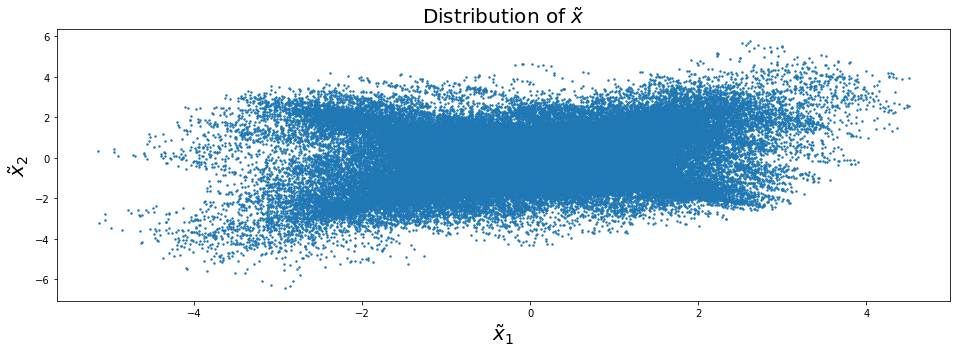

In [99]:
plt.figure(figsize=(16,5))
plt.scatter(x_tilde[0], x_tilde[1], s= 2)
plt.title(r'Distribution of $\tilde{x}$', fontsize=20)
plt.xlabel(r'$\tilde{x}_1$', fontsize=20)
plt.ylabel(r'$\tilde{x}_2$', fontsize=20)

# ICA: Gradient Ascent